<a href="https://colab.research.google.com/github/bysischpok/Lab1/blob/main/%D0%9B%D0%B0%D0%B13_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("StudentPerformanceFactors.csv")
print(data.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [22]:
#Предобработка датасета : удаление путых значений и замена категориальных переменных
data.info()
data = data.dropna()
replace_dict = {'Yes': 1, 'No': 0,
                'Low' : -1, 'Medium' : 0, 'High' : 1,
                'Public' : 1, 'Private' : 2,
                'Positive': 1,'Neutral' : 0, 'Negative':-1,
                'High School': 0, 'College':1, 'Postgraduate':2,
                'Near':0,'Moderate':1,'Far':2,
                'Male':1, 'Female':0}
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for category in categorical_cols:
  data[category] = data[category].map(replace_dict)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

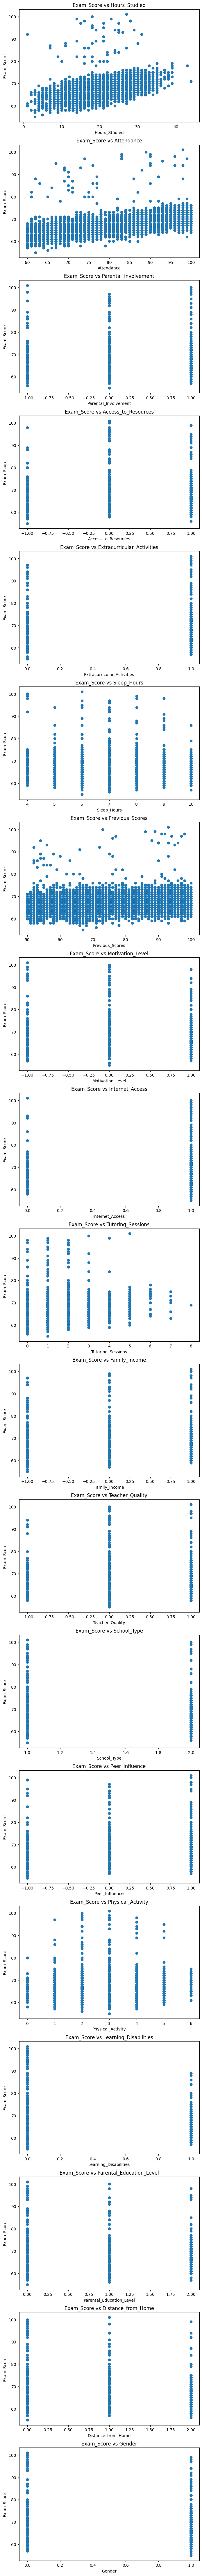

In [29]:
#Целевой переменной является Exam_Score - оценка, полученная на экзамене
data_target = 'Exam_Score'

feature_cols = [col for col in data.columns if col != data_target]
fig, axs = plt.subplots(nrows=len(feature_cols), ncols=1, figsize=(8,6*len(feature_cols)))
for i, col in enumerate(feature_cols):
 axs[i].scatter(data[col], data[data_target])
 axs[i].set_xlabel(col)
 axs[i].set_ylabel(data_target)
 axs[i].set_title(f"{data_target} vs {col}")

# show the plotplt.tight_layout()
plt.show()


In [30]:
# подготавливаем датасет к обучению
X = data.drop(['Exam_Score'], axis=1)
y = data['Exam_Score']
print(f'X shape: {X.shape} | y shape: {y.shape} ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

X shape: (6378, 19) | y shape: (6378,) 


In [32]:
# сразу напишем код функции, которая будет вычислять все нужные метрики
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [36]:
from sklearn.linear_model import LinearRegression

#Создаем модель линейной регрессии
modelLR = LinearRegression()

# Обучаем модель
modelLR.fit(X_train, y_train)

# Предиктим значения и выводим метрики
y_pr_LR = modelLR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

#Получились хорошие метрики, модель быстро и достаточно хорошо обучилась

RMSE:  1.4982
  R2: 0.8234
 Adjusted R2: 0.8207
 Cross Validated R2: 0.7191


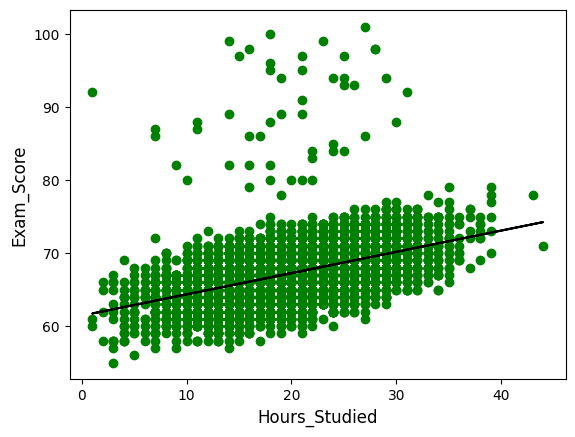

In [37]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = data['Hours_Studied'].values[:,np.newaxis]
y2 = data['Exam_Score'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Exam_Score', size=12)
plt.xlabel('Hours_Studied', size=12)
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures

#Создаем полиномиальную модель
poly = PolynomialFeatures(degree=3, include_bias=False)
#Обучаем модель
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=33)
# Создаем новую модель линейной регрессии для обучения её по полиномиальному разбиению
modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)
y_pr_PR = modelPR.predict(X_p_test)
#Выводим метрики
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

#Плохие метрики, полиномиальная модель не подходит для данного датасета. Скорее всего, это происходит из-за того, что изначально было много категориальных
#столбцов, которые я заменил фиксированными числовыми значениями.

RMSE:  2.7318
  R2: 0.5259
 Adjusted R2: -1.4249
 Cross Validated R2: 0.4481


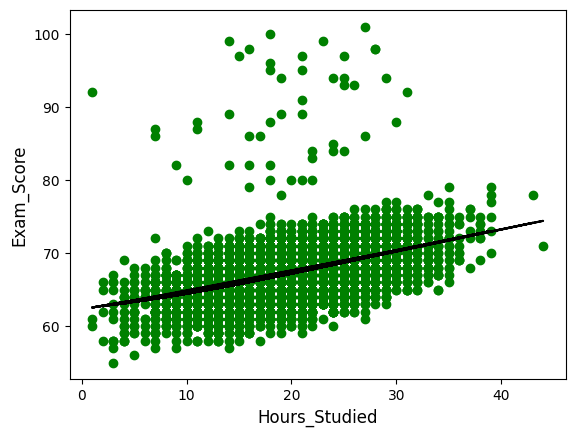

In [43]:
#Отрисовываем результат обучения
X2 = data['Hours_Studied'].values[:,np.newaxis]
y2 = data['Exam_Score'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Exam_Score', size=12)
plt.xlabel('Hours_Studied', size=12)
plt.show()

In [44]:
from sklearn.tree import DecisionTreeRegressor

# Создаем модель регрессии дерево принятия решений
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)
#Эта модель совершенно не подходит для моего датасета

RMSE:  3.2123
  R2: 0.188
 Adjusted R2: 0.1757
 Cross Validated R2: 0.0956


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Создаем модель регрессии случайного леса
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

#Метрики получились средние

RMSE:  1.9828
  R2: 0.6906
 Adjusted R2: 0.6859
 Cross Validated R2: 0.6222


In [60]:
from sklearn.svm import SVR

# Создаем модель по методу опорных векторов, ядро линейное
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

#Самые лучшие метрики, но самое долгое обучение и вычисление этих самых метрик(больше 7 минут)
#Стоит заметить, что обычная линейная регрессия отстает совсем немного, но обучилась в несколько раз быстрее

RMSE:  1.4955
  R2: 0.824
 Adjusted R2: 0.8213
 Cross Validated R2: 0.7194


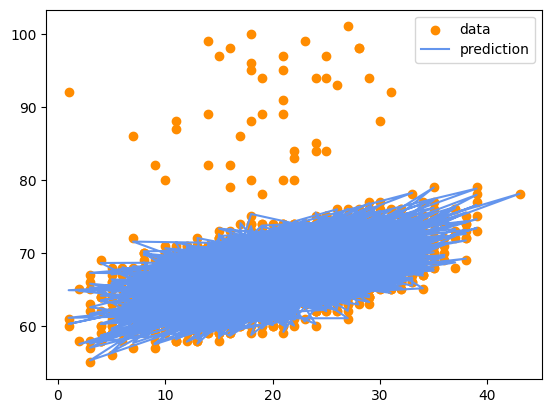

In [48]:
#Отрисовываем модель
plt.scatter(X_train['Hours_Studied'], y_train, color='darkorange',
            label='data')
plt.plot(X_train['Hours_Studied'], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [59]:
# Создаем модель по методу опорных векторов, ядро полномиальное
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

#Метрики средние, хуже чем у линейного ядра, но обучение и вычисление метрик прошло в разы быстрее

RMSE:  1.7879
  R2: 0.7484
 Adjusted R2: 0.7446
 Cross Validated R2: 0.6521


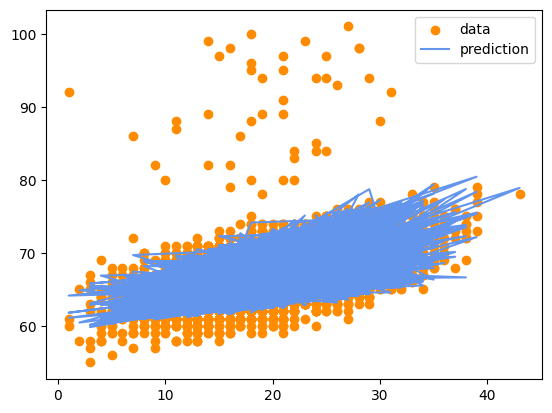

In [50]:
#Отрисовываем модель
plt.scatter(X_train['Hours_Studied'], y_train, color='darkorange',
            label='data')
plt.plot(X_train['Hours_Studied'], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [58]:
# Создаем модель по методу опорных векторов, ядро радиальная базовая функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.8935
  R2: 0.7179
 Adjusted R2: 0.7136
 Cross Validated R2: 0.6242


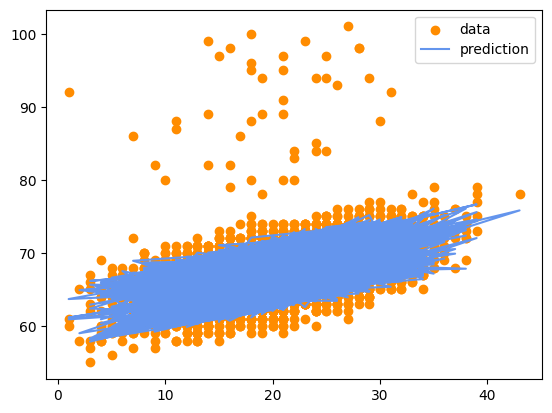

In [52]:
#Отрисовываем модель
plt.scatter(X_train['Hours_Studied'], y_train, color='darkorange',
            label='data')
plt.plot(X_train['Hours_Studied'], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [57]:
from sklearn.linear_model import ElasticNet

# Создаем модель регрессии ElasticNet
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  1.5925
  R2: 0.8004
 Adjusted R2: 0.7974
 Cross Validated R2: 0.7009


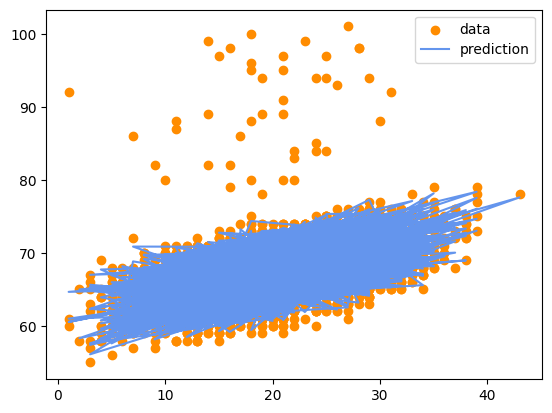

In [54]:
plt.scatter(X_train['Hours_Studied'], y_train, color='darkorange',
            label='data')
plt.plot(X_train['Hours_Studied'], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()


По итогу, наилучшей моделью для моего датасета, если смотреть на метрики, является модель регрессии опорных векторов с линейным ядром (RMSE:1.4955, R2:0.824, Adjusted R2:0.8213, Cross Validated R2:0.7194). Но эта модель обучалась и вычисляла метрики в разы дольше остальных: среднее время других моделей составила около 20 секунд, у этой больше 7 минут.

Поэтому я считаю что лучшей моделью является модель линейной регрессии. Её метрики очень близки к SVR с линейным ядром, но обучилась она в разы быстрее.(RMSE:  1.4982, R2: 0.8234,Adjusted R2: 0.8207,Cross Validated R2: 0.7191)